# Timeseries in R tutorial with an empirical SE bent.

by Abram Hindle <hindle1@ualberta.ca>

### Thorough Resources:

* Welcome to a Little Book of R for Time Series!¶ https://a-little-book-of-r-for-time-series.readthedocs.io/en/latest/
* Book on Timeseries analysis http://db.ucsd.edu/static/TimeSeries.pdf
* ARIMA Modelling (pretty indepth) https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
* Time Series Analysis with R http://r-statistics.co/Time-Series-Analysis-With-R.html
* Using R for Time Series Analysis¶ https://a-little-book-of-r-for-time-series.readthedocs.io/en/latest/src/timeseries.html

### Videos:

* https://www.youtube.com/watch?v=gj4L2isnOf8

In [2]:
# Taken from Dan Han's introduction

data(LakeHuron)
fit <- arima(LakeHuron, order = c(1, 0, 1))
fit


Call:
arima(x = LakeHuron, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.7449  0.3206   579.0555
s.e.  0.0777  0.1135     0.3501

sigma^2 estimated as 0.4749:  log likelihood = -103.25,  aic = 214.49

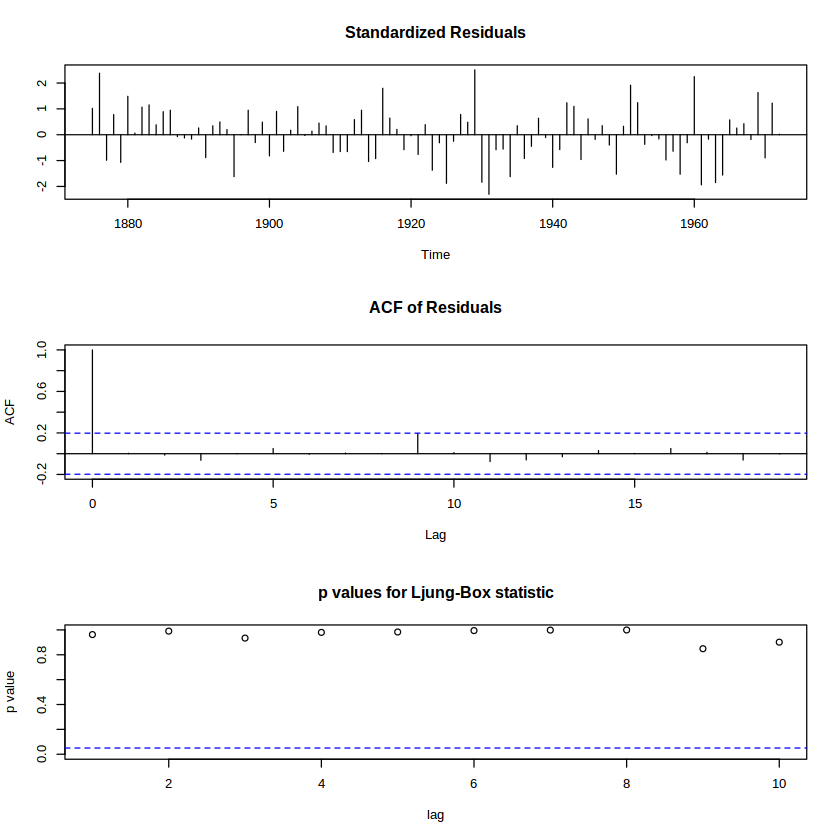

In [3]:
tsdiag(fit)

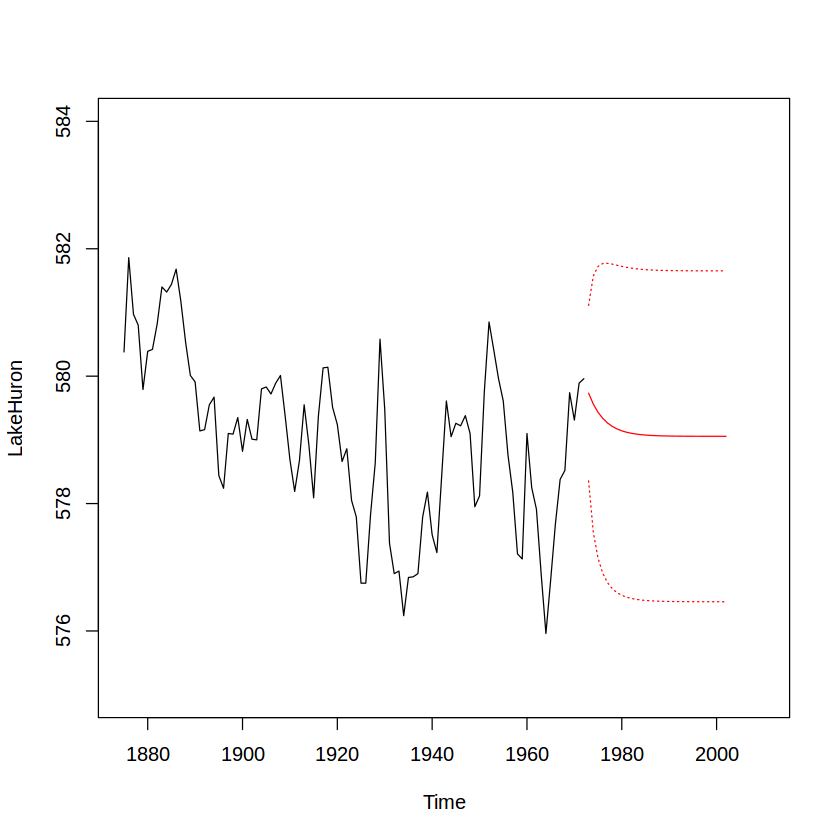

In [9]:
fit <- arima(LakeHuron, order = c(1, 0, 1))
plot(LakeHuron, xlim = c(1875, 1980+30), ylim = c(575, 584))
LH.pred <- predict(fit, n.ahead = 30)
lines(LH.pred$pred, col = "red")
lines(LH.pred$pred + 2*LH.pred$se, col = "red", lty = 3)
lines(LH.pred$pred - 2*LH.pred$se, col = "red", lty = 3)

In [12]:
v <- read.csv("data/ff-run.csv")

In [13]:
summary(v)

      time         id              mA              V               W        
 Min.   :  0.019   B:10666   Min.   :138.3   Min.   :3.980   Min.   :0.562  
 1st Qu.: 52.525             1st Qu.:223.1   1st Qu.:4.070   1st Qu.:0.910  
 Median :105.018             Median :228.3   Median :4.080   Median :0.931  
 Mean   :105.022             Mean   :268.9   Mean   :4.075   Mean   :1.095  
 3rd Qu.:157.513             3rd Qu.:247.7   3rd Qu.:4.080   3rd Qu.:1.011  
 Max.   :210.007             Max.   :865.9   Max.   :4.130   Max.   :3.464  

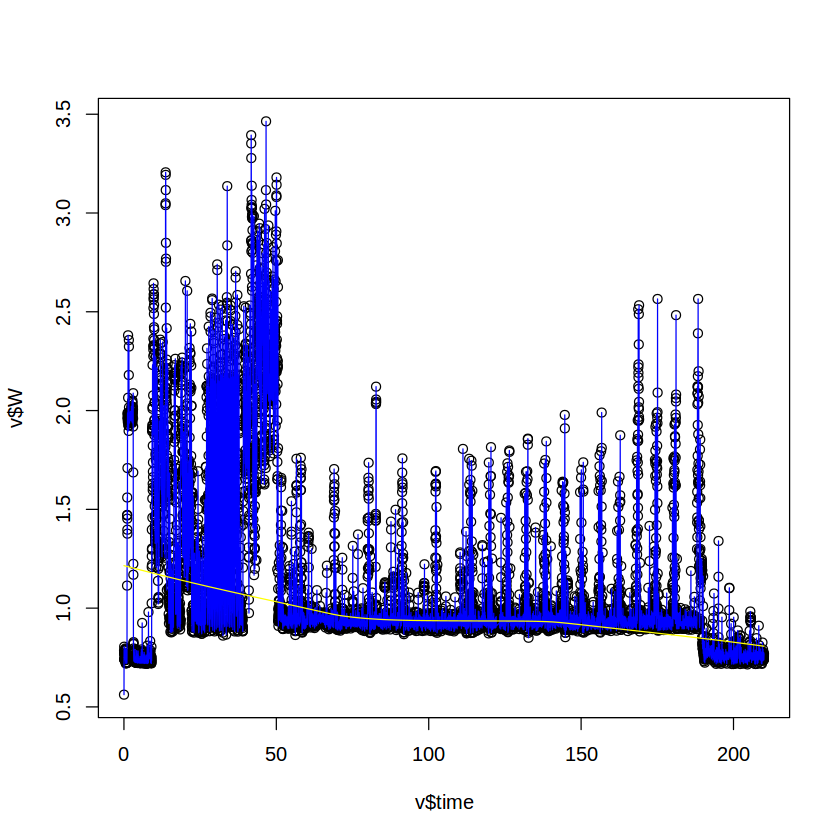

In [18]:
plot(v$time,v$W)
lines(v$time,v$W,col=c("blue"))
lines(lowess(v$time,v$W),col=c("yellow"))

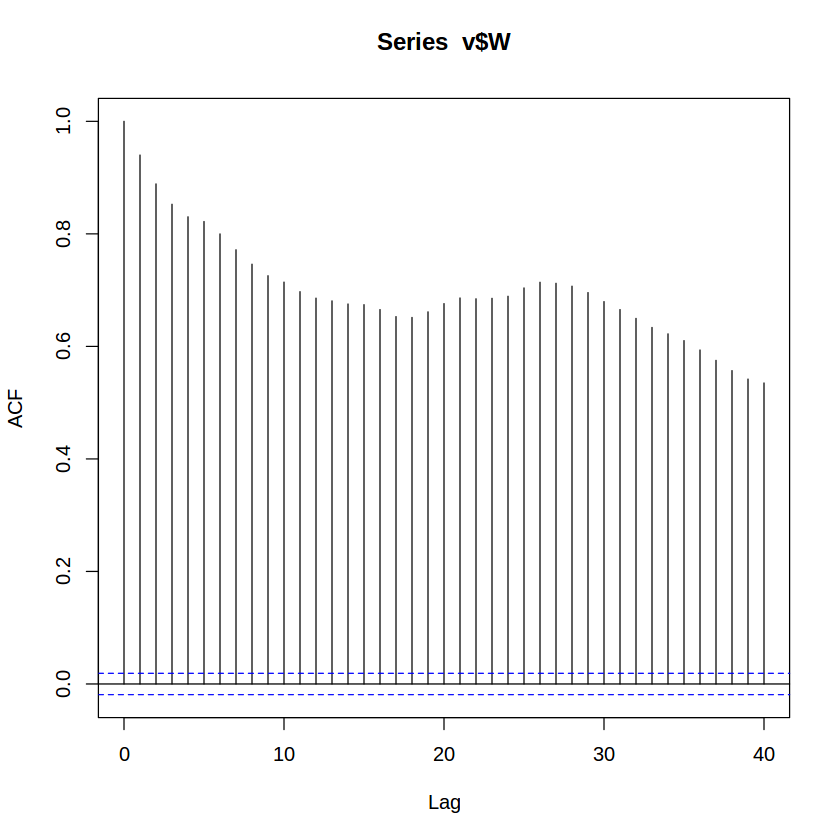

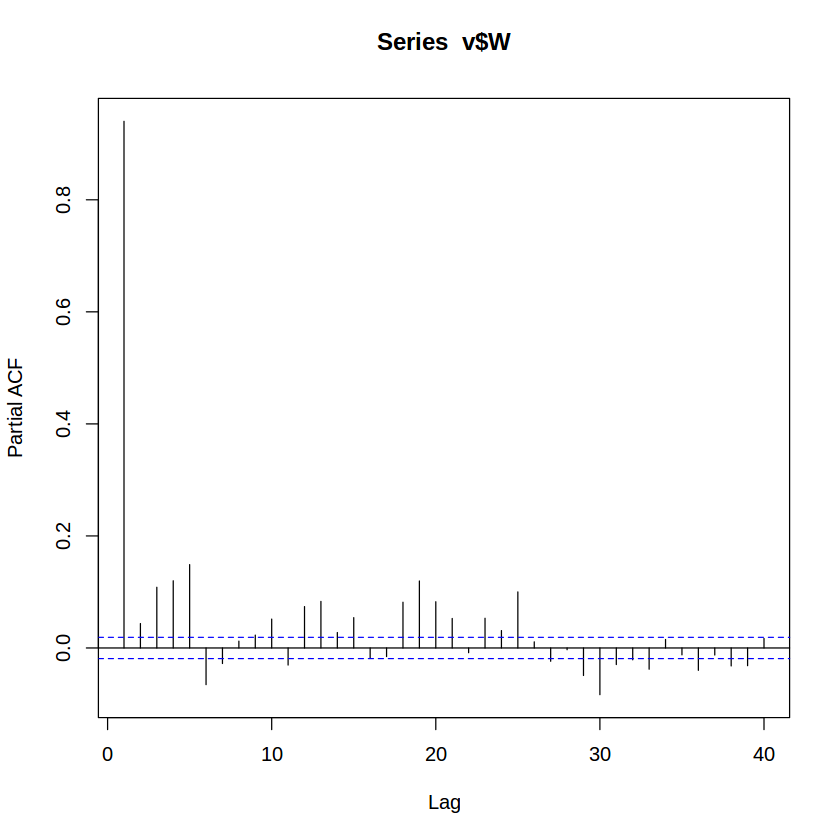

In [22]:
acf(v$W) # auto correlation of watts
pacf(v$W) # partial auto correlation watts

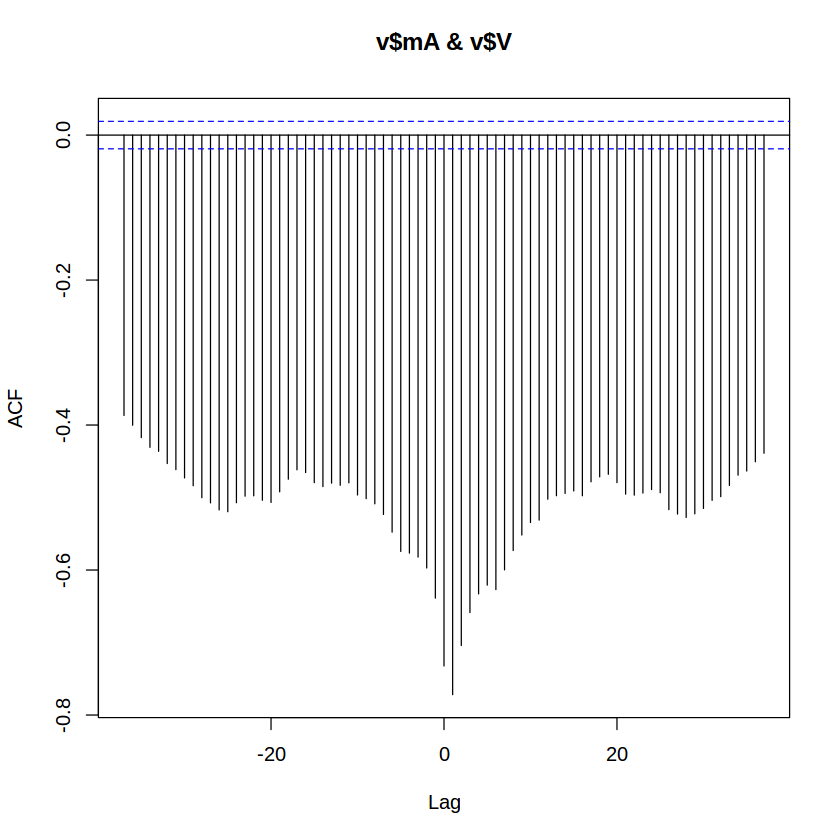

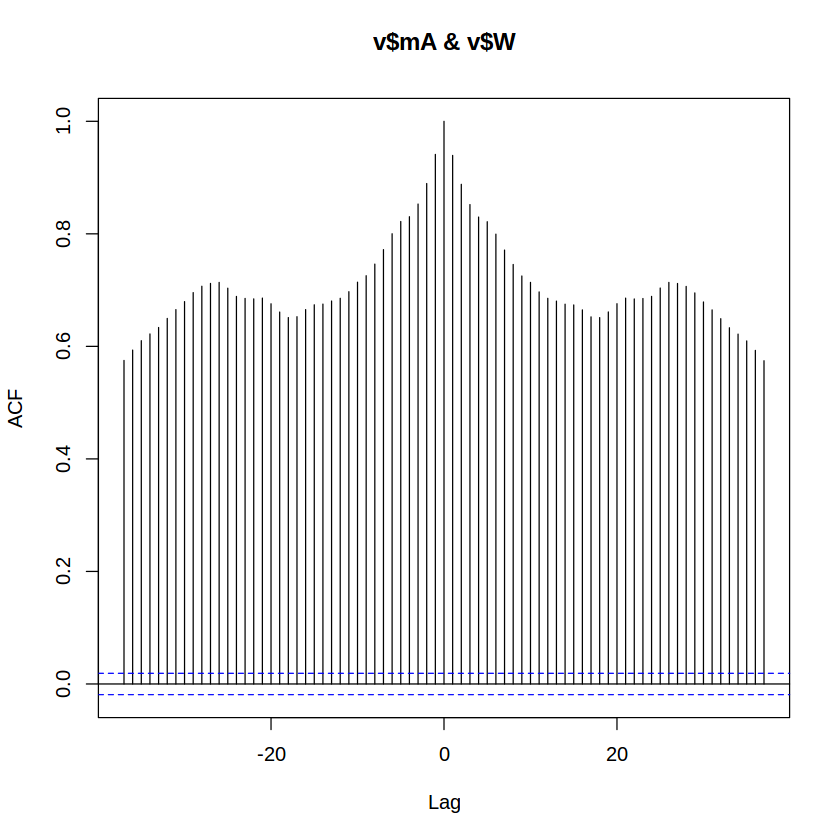

In [23]:
ccf(v$mA,v$V) # cross correlation of Amps and Volts
ccf(v$mA,v$W) # cross correlation of Amps and Watts

In [28]:
vfit <- arima(v$W,order = c(6, 0, 1))

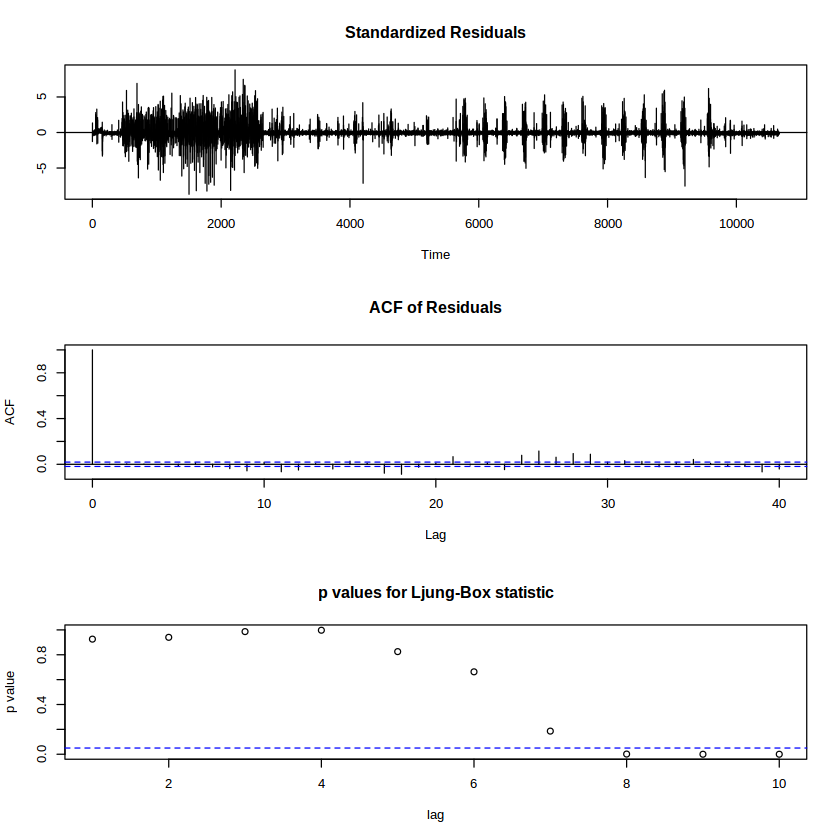

In [29]:
tsdiag(vfit)

Obviously the ARIMA needs a bit of configuration.

In [30]:
# apt-get install r-cran-rcpparmadillo
# install.packages("forecast")
library(forecast)

In [32]:
vfit <- auto.arima(v$W, seasonal=FALSE)
vfit

Series: v$W 
ARIMA(5,1,5) 

Coefficients:
         ar1      ar2      ar3      ar4     ar5      ma1     ma2      ma3
      0.0286  -0.2022  -0.0238  -0.1852  0.6505  -0.1577  0.0620  -0.1293
s.e.  0.0276   0.0282   0.0317   0.0308  0.0224   0.0296  0.0332   0.0389
         ma4      ma5
      0.0257  -0.6456
s.e.  0.0370   0.0297

sigma^2 estimated as 0.01903:  log likelihood=5996.81
AIC=-11971.61   AICc=-11971.59   BIC=-11891.59

In [33]:
vfit2 <- arima(v$W,order=c(5,1,5))
vfit2


Call:
arima(x = v$W, order = c(5, 1, 5))

Coefficients:
         ar1      ar2      ar3      ar4     ar5      ma1     ma2      ma3
      0.0286  -0.2022  -0.0238  -0.1852  0.6505  -0.1577  0.0620  -0.1293
s.e.  0.0276   0.0282   0.0317   0.0308  0.0224   0.0296  0.0332   0.0389
         ma4      ma5
      0.0257  -0.6456
s.e.  0.0370   0.0297

sigma^2 estimated as 0.01901:  log likelihood = 5996.81,  aic = -11971.61

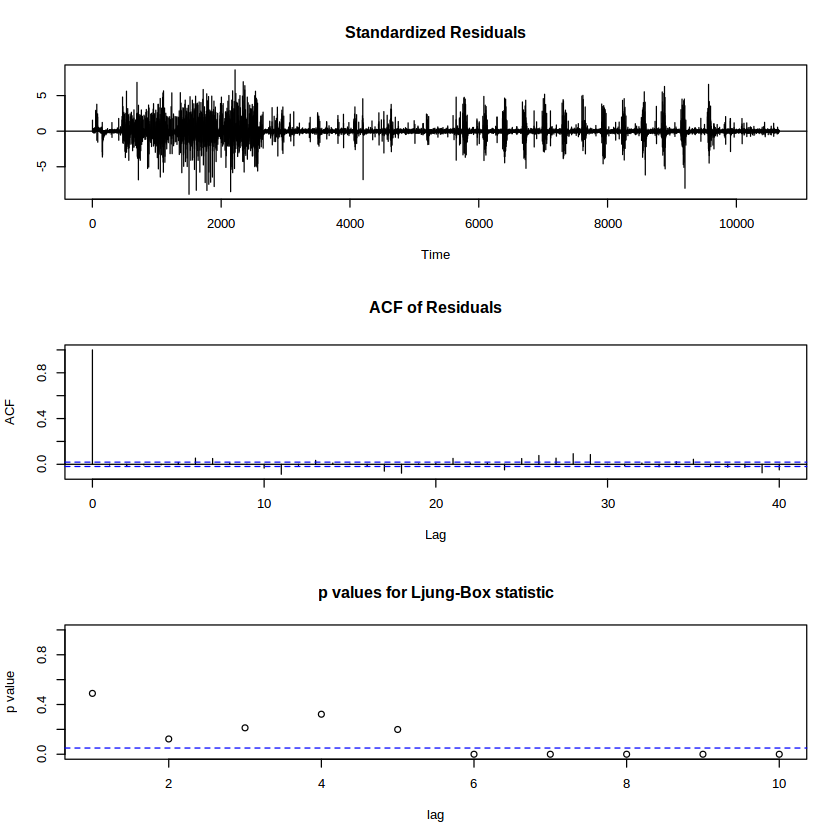

In [34]:
tsdiag(vfit2)

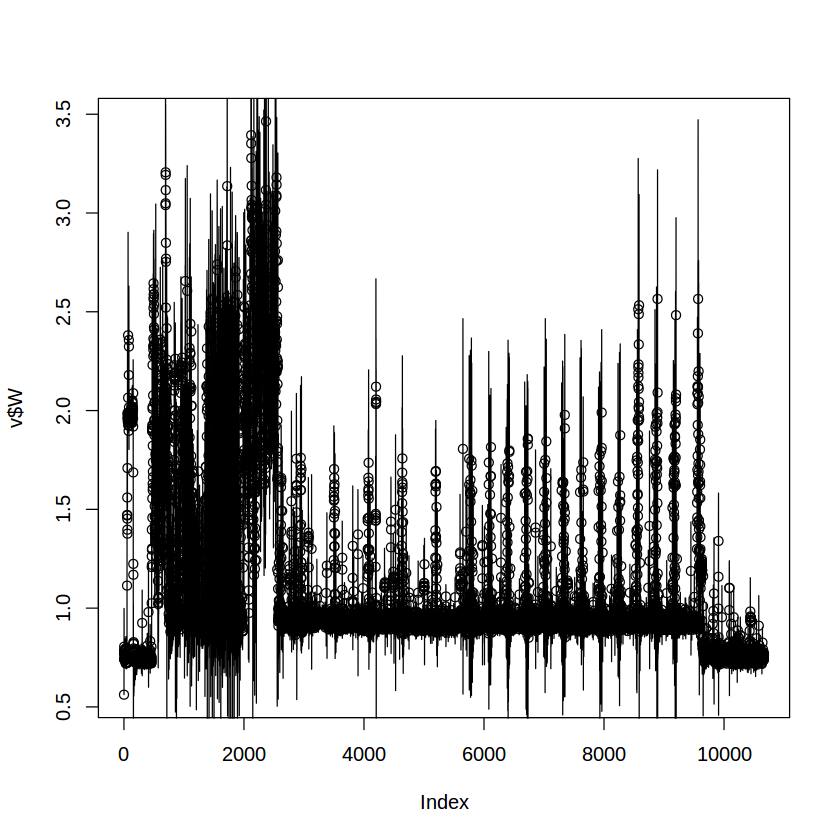

In [41]:
plot(v$W)
lines(v$W + vfit2$residuals)

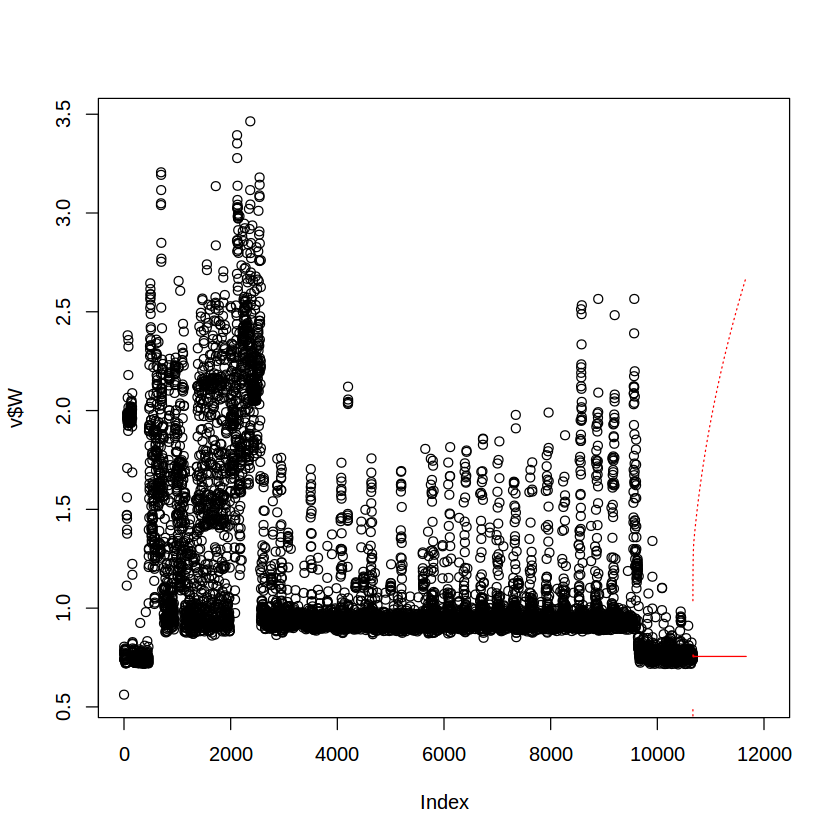

In [42]:
plot(v$W, xlim = c(0, 12000))
LH.pred <- predict(vfit2, n.ahead = 1000 )
lines(LH.pred$pred, col = "red")
lines(LH.pred$pred + 2*LH.pred$se, col = "red", lty = 3)
lines(LH.pred$pred - 2*LH.pred$se, col = "red", lty = 3)

In [97]:
v2 <- read.csv("data/vuze-aggregate.csv")
#summary(v2)
v2 <- v2[order(v2$sURI),]
v2 <- data.frame(v2)
v2a <- aggregate(v2$kwh,by=list(v2$sURI),FUN=mean)
names(v2a) <- c("jar","kwh")
v2a

jar,kwh
vuze-26730.jar,0.003985470
vuze-26731.jar,0.003858426
vuze-26732.jar,0.003736978
vuze-26734.jar,0.003673089
vuze-26735.jar,0.003661913
vuze-26737.jar,0.003978414
vuze-26738.jar,0.003807397
vuze-26744.jar,0.003935113
vuze-26745.jar,0.003389390
vuze-26747.jar,0.003329398


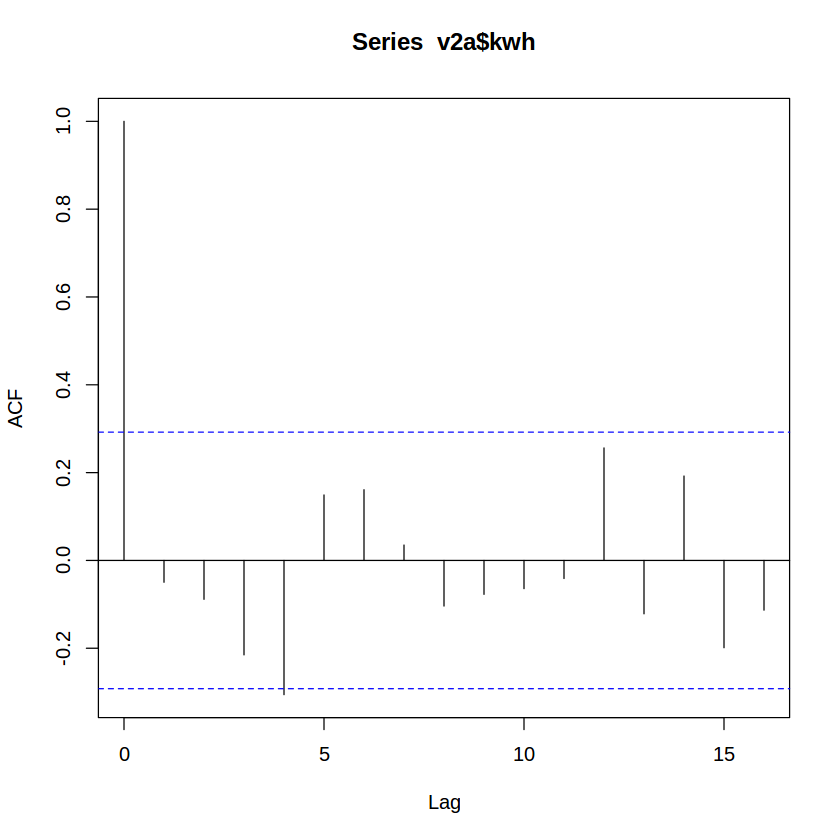

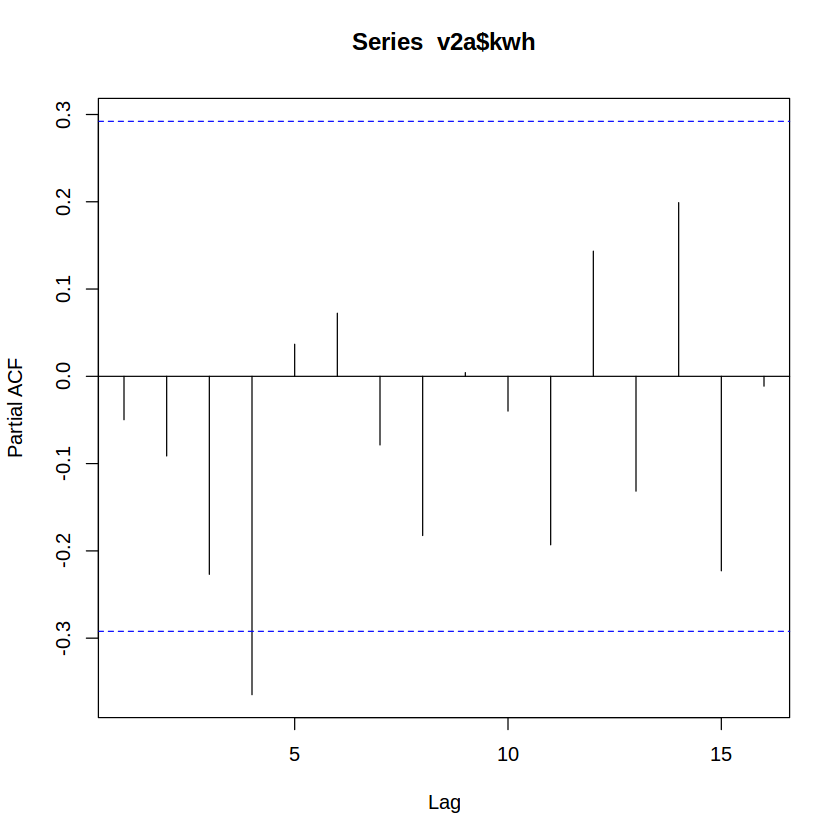

In [98]:
acf(v2a$kwh) 
pacf(v2a$kwh)